In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import panel as pn
import hvplot.pandas
from wordcloud import WordCloud, STOPWORDS

In [2]:
df = pd.read_csv('DS_jobs.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         660 non-null    int64  
 1   Job Title          660 non-null    object 
 2   Salary Estimate    660 non-null    object 
 3   Job Description    660 non-null    object 
 4   Rating             660 non-null    float64
 5   Company Name       660 non-null    object 
 6   Location           660 non-null    object 
 7   Headquarters       660 non-null    object 
 8   Size               660 non-null    object 
 9   Type of ownership  660 non-null    object 
 10  Industry           660 non-null    object 
 11  Sector             660 non-null    object 
 12  Revenue            660 non-null    object 
 13  min_salary         660 non-null    int64  
 14  max_salary         660 non-null    int64  
 15  avg_salary         660 non-null    int64  
 16  job_state          660 non

In [3]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'min_salary',
       'max_salary', 'avg_salary', 'job_state', 'same_state', 'company_age',
       'python', 'excel', 'hadoop', 'spark', 'aws', 'tableau', 'big_data',
       'job_simp', 'seniority'],
      dtype='object')

In [4]:
df.describe()

,Unnamed: 0,Rating,min_salary,max_salary,avg_salary,same_state,company_age,python,excel,hadoop,spark,aws,tableau,big_data
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,329.500000,3.587424,99.296970,148.301515,123.612121,0.407576,29.736364,0.730303,0.440909,0.212121,0.281818,0.260606,0.184848,0.206061
std,190.669872,1.183540,33.161485,48.264588,39.786698,0.491756,39.763033,0.444139,0.496873,0.409120,0.450226,0.439298,0.388469,0.404781
min,0.000000,0.000000,31.000000,56.000000,43.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,164.750000,3.300000,79.000000,119.000000,103.000000,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,329.500000,3.800000,91.000000,133.000000,114.000000,0.000000,16.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,494.250000,4.300000,122.000000,165.000000,136.000000,1.000000,37.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,659.000000,5.000000,212.000000,331.000000,271.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Type of ownership,...,company_age,python,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,...,27,0,0,0,0,1,0,0,data scientist,senior
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,...,52,0,0,1,0,0,0,1,data scientist,na
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,...,39,1,1,0,0,1,0,0,data scientist,na
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,...,20,1,1,0,0,1,0,0,data scientist,na
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY","New York, NY",51 to 200 employees,Company - Private,...,22,1,1,0,0,0,0,0,data scientist,na


In [6]:
df.Location.unique()

array(['New York, NY', 'Chantilly, VA', 'Boston, MA', 'Newton, MA',
       'Santa Barbara, CA', 'Cambridge, MA', 'Bedford, MA',
       'San Diego, CA', 'Chicago, IL', 'Herndon, VA', 'Saint Louis, MO',
       'Richland, WA', 'Northbrook, IL', 'Washington, DC', 'Memphis, TN',
       'Plano, TX', 'West Grove, PA', 'Phoenix, AZ', 'Appleton, WI',
       'Atlanta, GA', 'Orlando, FL', 'Lexington, MA', 'McLean, VA',
       'San Francisco, CA', 'Sheboygan, WI', 'Bothell, WA', 'Lincoln, NE',
       'Overland Park, KS', 'Santa Monica, CA', 'Portsmouth, NH',
       'Ewing, NJ', 'South San Francisco, CA', 'Palo Alto, CA',
       'Bellevue, WA', 'New Orleans, LA', 'Akron, OH', 'Fort Wayne, IN',
       'Woburn, MA', 'Carson, CA', 'Coral Gables, FL', 'Santa Clara, CA',
       'Brisbane, CA', 'Winter Park, FL', 'Redwood City, CA',
       'Peoria, IL', 'Ipswich, MA', 'Carmel, IN', 'Emeryville, CA',
       'Gaithersburg, MD', 'Longmont, CO', 'Austin, TX', 'Yakima, WA',
       'Santa Cruz, CA', 'Springfie

In [7]:
df.Sector.unique()

array(['Insurance', 'Business Services', 'Manufacturing',
       'Information Technology', 'Biotech & Pharmaceuticals', 'Retail',
       'Oil, Gas, Energy & Utilities', 'Government', 'Health Care',
       'Finance', 'Aerospace & Defense', '-1',
       'Transportation & Logistics', 'Media', 'Telecommunications',
       'Real Estate', 'Travel & Tourism', 'Agriculture & Forestry',
       'Education', 'Accounting & Legal', 'Non-Profit',
       'Construction, Repair & Maintenance', 'Consumer Services'],
      dtype=object)

In [8]:
df['Location'] = df['Location'].replace({'United States': 'San Francisco, CA', 'Patuxent, Anne Arundel, MD':'Anne Arundel, MD'})
df[['Location City', 'Location State']] = df.Location.str.split(', ',expand=True)
df.drop('Location', axis=1, inplace=True)
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Headquarters,Size,Type of ownership,Industry,...,excel,hadoop,spark,aws,tableau,big_data,job_simp,seniority,Location City,Location State
0,0,Sr Data Scientist,137-171,Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst,"New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,...,0,0,0,1,0,0,data scientist,senior,New York,NY
1,1,Data Scientist,137-171,"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech,"Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,...,0,1,0,0,0,1,data scientist,na,Chantilly,VA
2,2,Data Scientist,137-171,Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group,"Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,...,1,0,0,1,0,0,data scientist,na,Boston,MA
3,3,Data Scientist,137-171,JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON,"Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,...,1,0,0,1,0,0,data scientist,na,Newton,MA
4,4,Data Scientist,137-171,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions,"New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,...,1,0,0,0,0,0,data scientist,na,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,655,Data Scientist,105-167,Summary\n\nWe’re looking for a data scientist ...,3.6,TRANZACT,"Fort Lee, NJ",1001 to 5000 employees,Company - Private,Advertising & Marketing,...,1,1,0,0,1,1,data scientist,na,Fort Lee,NJ
656,656,Data Scientist,105-167,Job Description\nBecome a thought leader withi...,0.0,JKGT,-1,-1,-1,-1,...,0,0,0,0,0,0,data scientist,na,San Francisco,CA
657,657,Data Scientist,105-167,Join a thriving company that is changing the w...,0.0,AccessHope,-1,-1,-1,-1,...,1,1,0,0,1,0,data scientist,na,Irwindale,CA
658,658,Data Scientist,105-167,100 Remote Opportunity As an AINLP Data Scient...,5.0,ChaTeck Incorporated,"Santa Clara, CA",1 to 50 employees,Company - Private,Advertising & Marketing,...,0,1,1,0,0,1,data scientist,na,San Francisco,CA


In [9]:
df['python'] = df['python'].replace({0: np.nan, 1: 'python'})
df['excel'] = df['excel'].replace({0: np.nan, 1: 'excel'})
df['hadoop'] = df['hadoop'].replace({0: np.nan, 1: 'hadoop'})
df['spark'] = df['spark'].replace({0: np.nan, 1: 'spark'})
df['aws'] = df['aws'].replace({0: np.nan, 1: 'aws'})
df['tableau'] = df['tableau'].replace({0: np.nan, 1: 'tableau'})
df['big_data'] = df['big_data'].replace({0: np.nan, 1: 'big_data'})

[Text(0.5, 1.0, 'Count of various Sectors')]

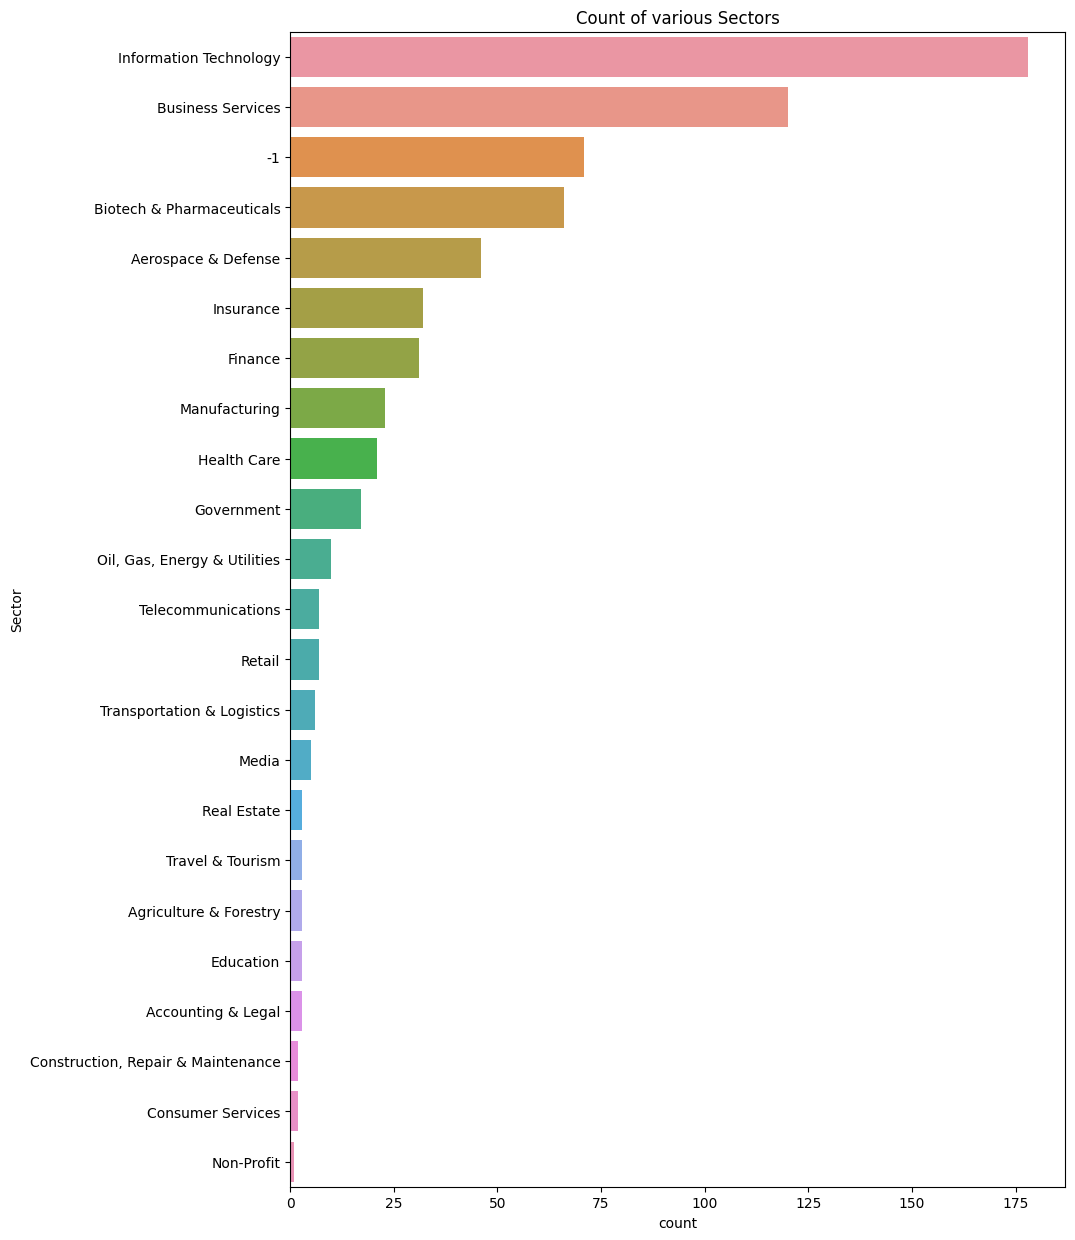

In [10]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.countplot(data=df,y='Sector', order=df['Sector'].value_counts().index).set(title='Count of various Sectors')

[Text(0.5, 1.0, 'Count of various Industries')]

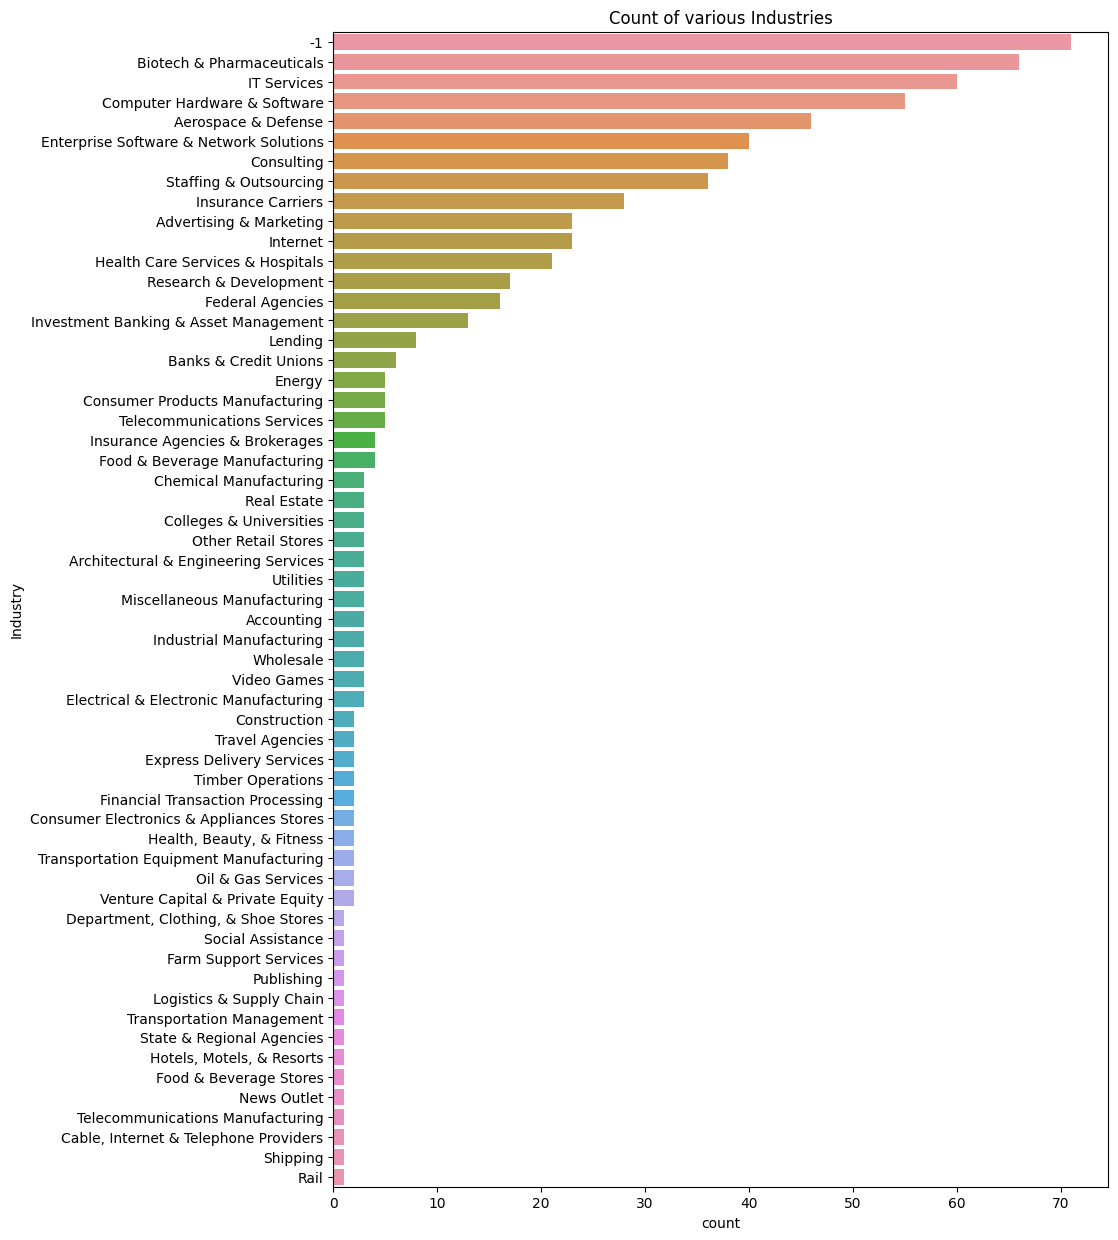

In [11]:
fig, ax = plt.subplots(figsize=(10, 15))
sns.countplot(data=df,y='Industry', order=df['Industry'].value_counts().index).set(title='Count of various Industries')

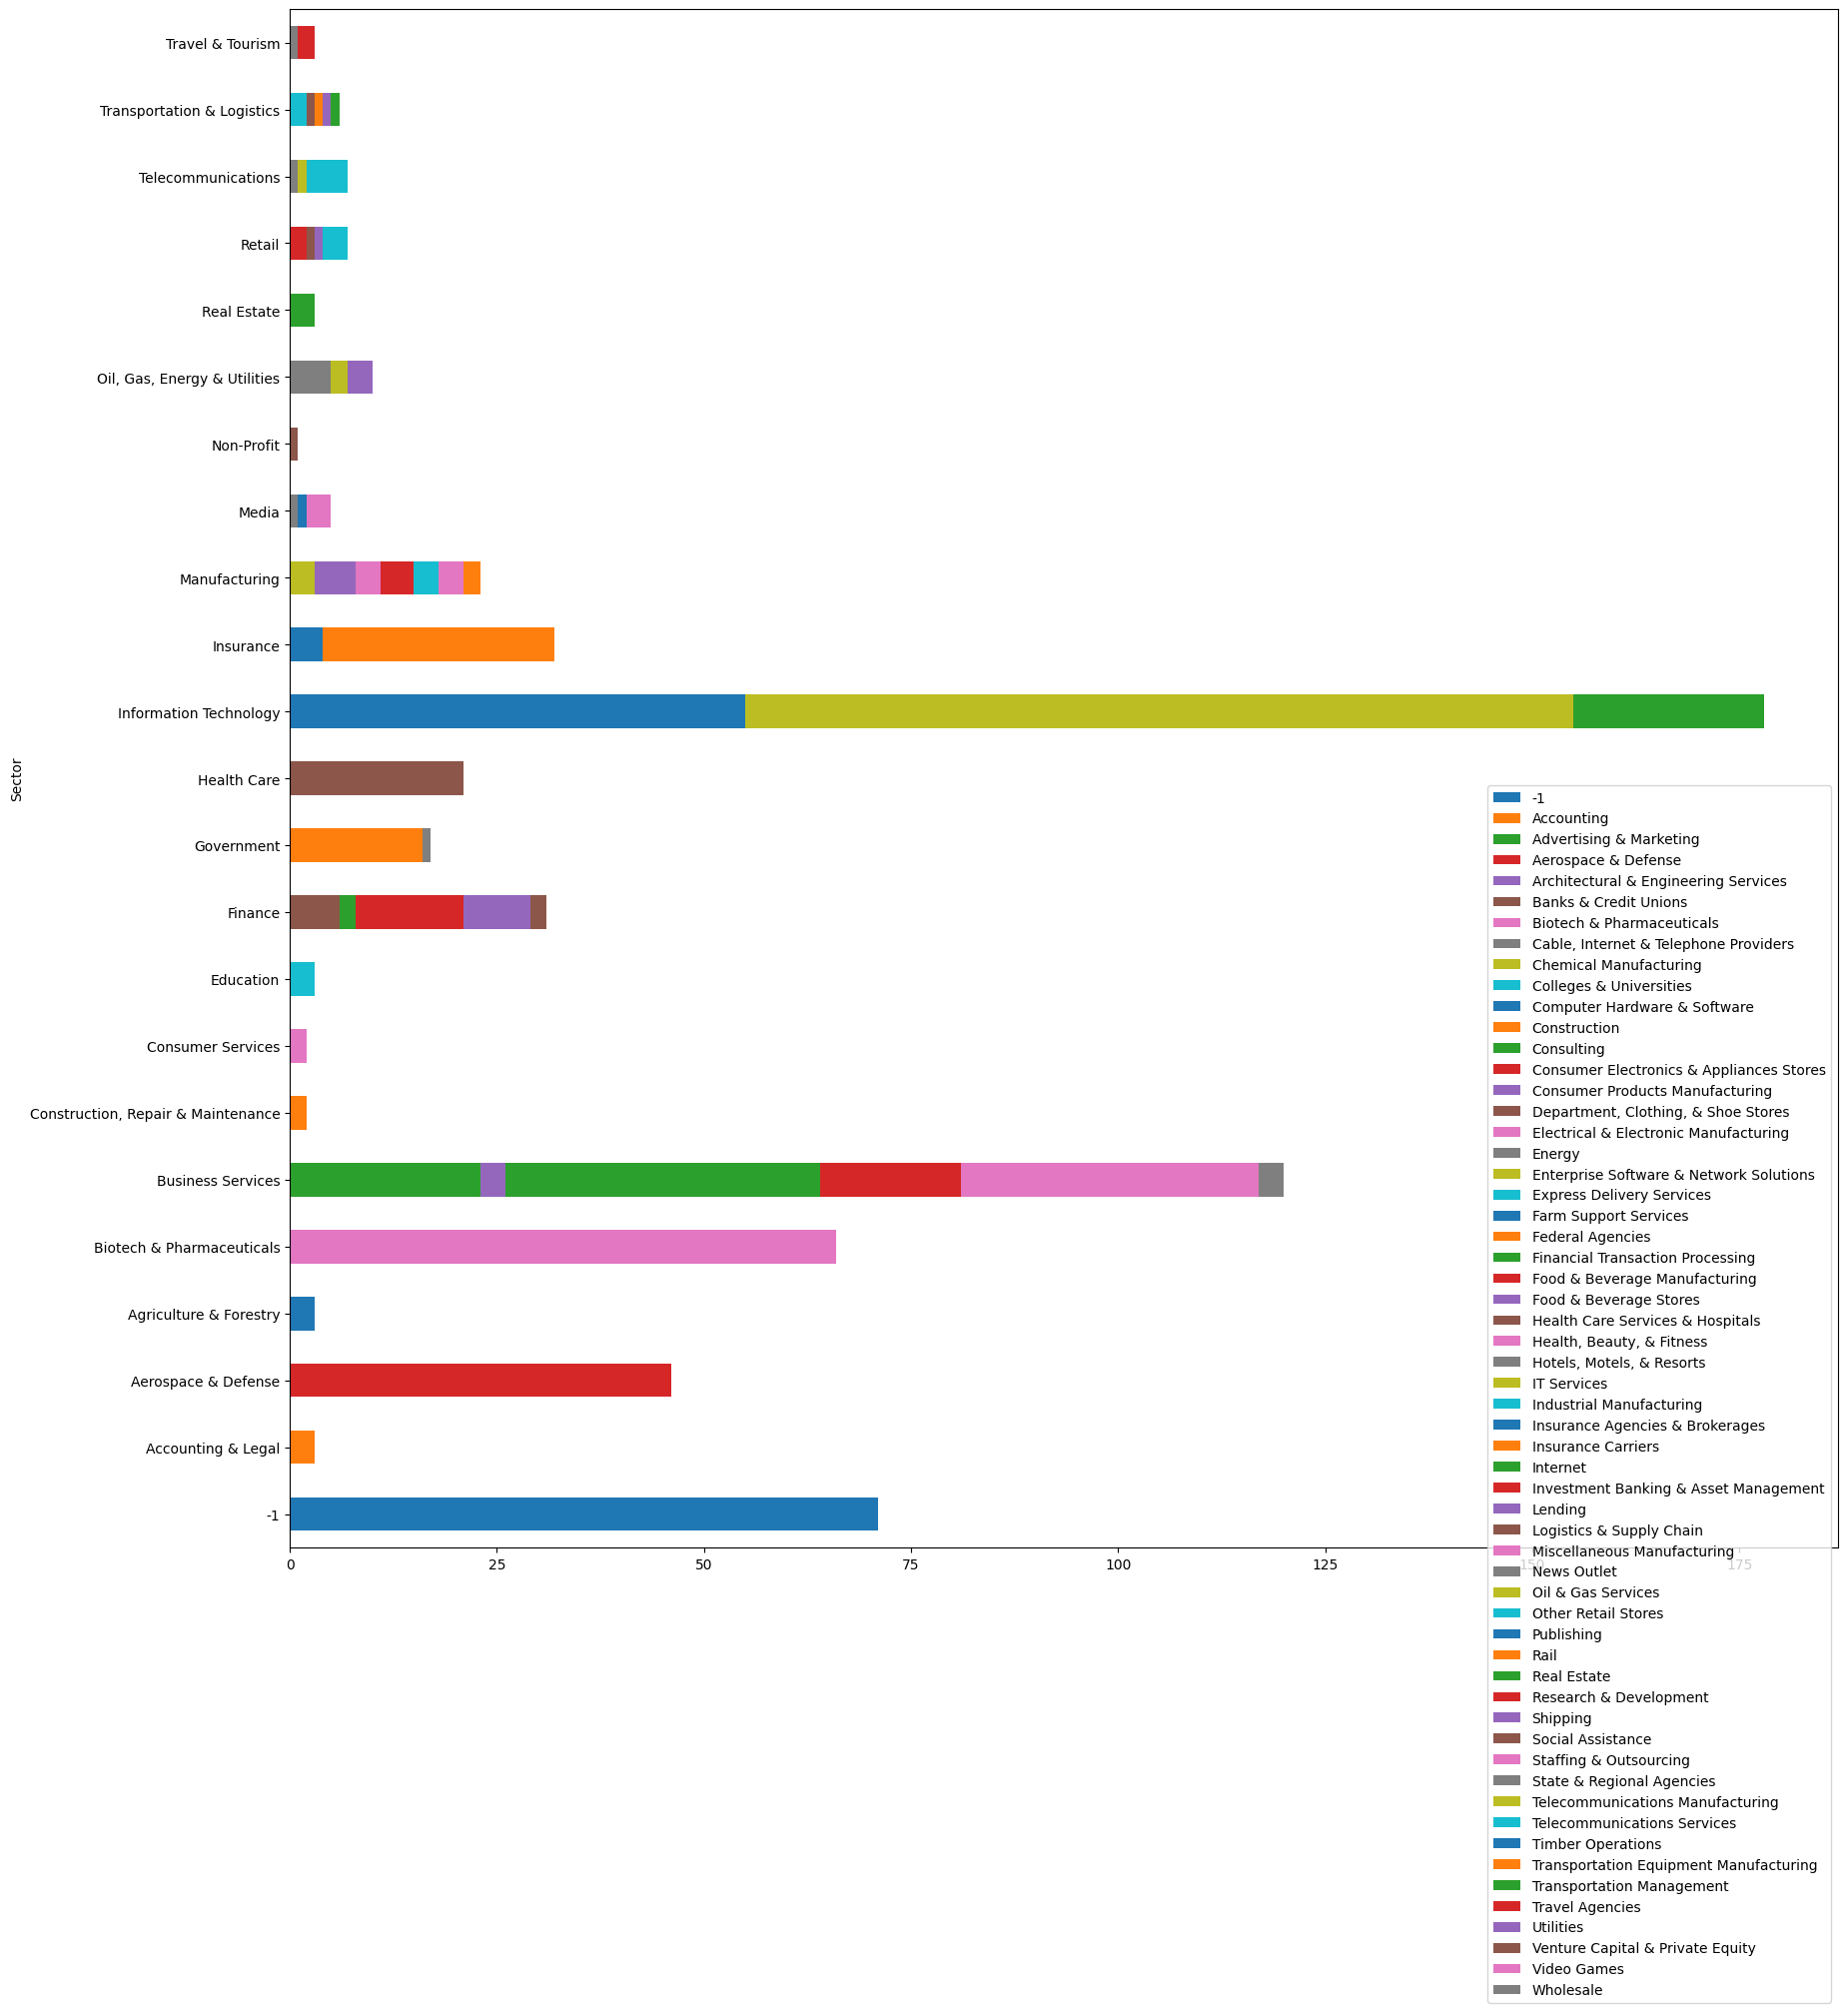

In [12]:
fig, ax = plt.subplots(figsize=(20,20))
tmp = df.groupby('Sector')['Industry'].value_counts().sort_values(ascending=False)
tmp.unstack().plot(kind='barh', stacked=True, ax=ax).legend(loc='best',bbox_to_anchor=(1.0, 0.5))

In [13]:
def plot_industry_filter_tool(df, tool):
    industry_filter_excel = df[df[tool] == tool]
    counts = industry_filter_excel.groupby(['Sector', 'Industry']).size().unstack()
    fig, ax = plt.subplots(figsize=(20, 20))
    counts.plot.barh(stacked=True, ax=ax).legend(loc='best',bbox_to_anchor=(1.0, 0.5))
    plt.xticks(rotation=70, ha='right')
    plt.xlabel('Sector')
    plt.ylabel('Count')
    plt.title(f'Usage of {tool.capitalize()}')
    plt.show()

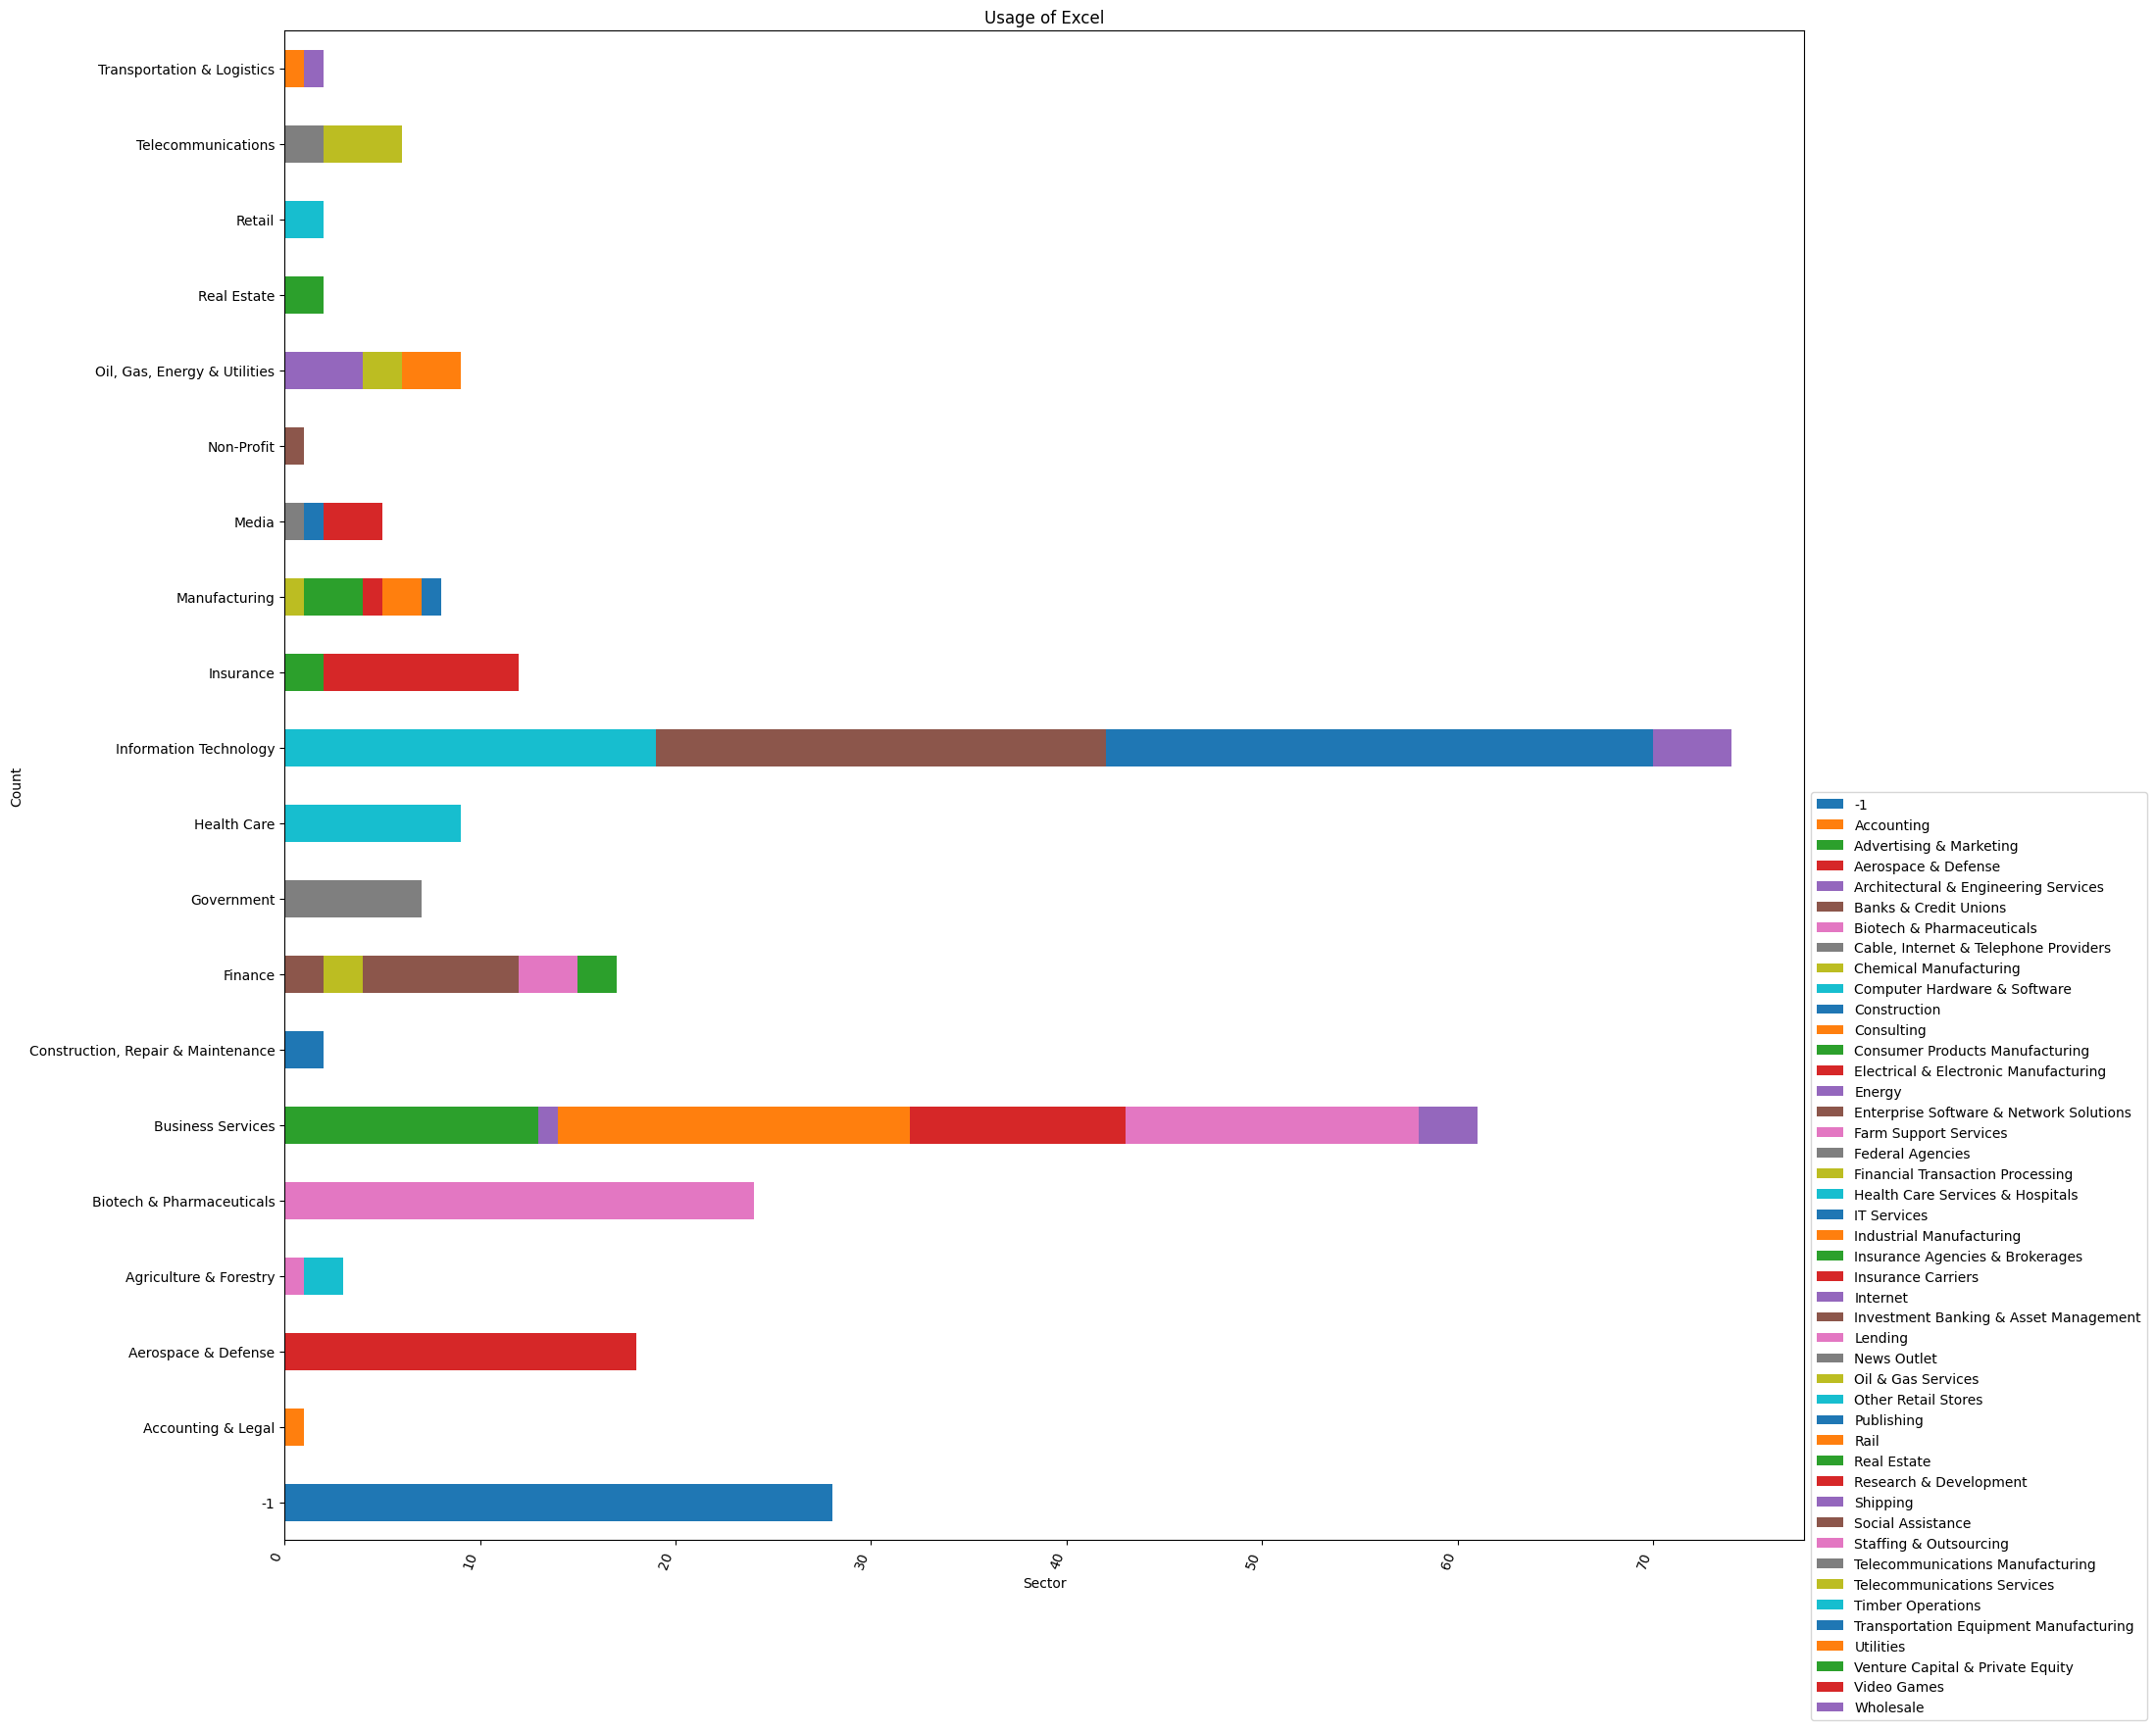

In [14]:
plot_industry_filter_tool(df, 'excel')

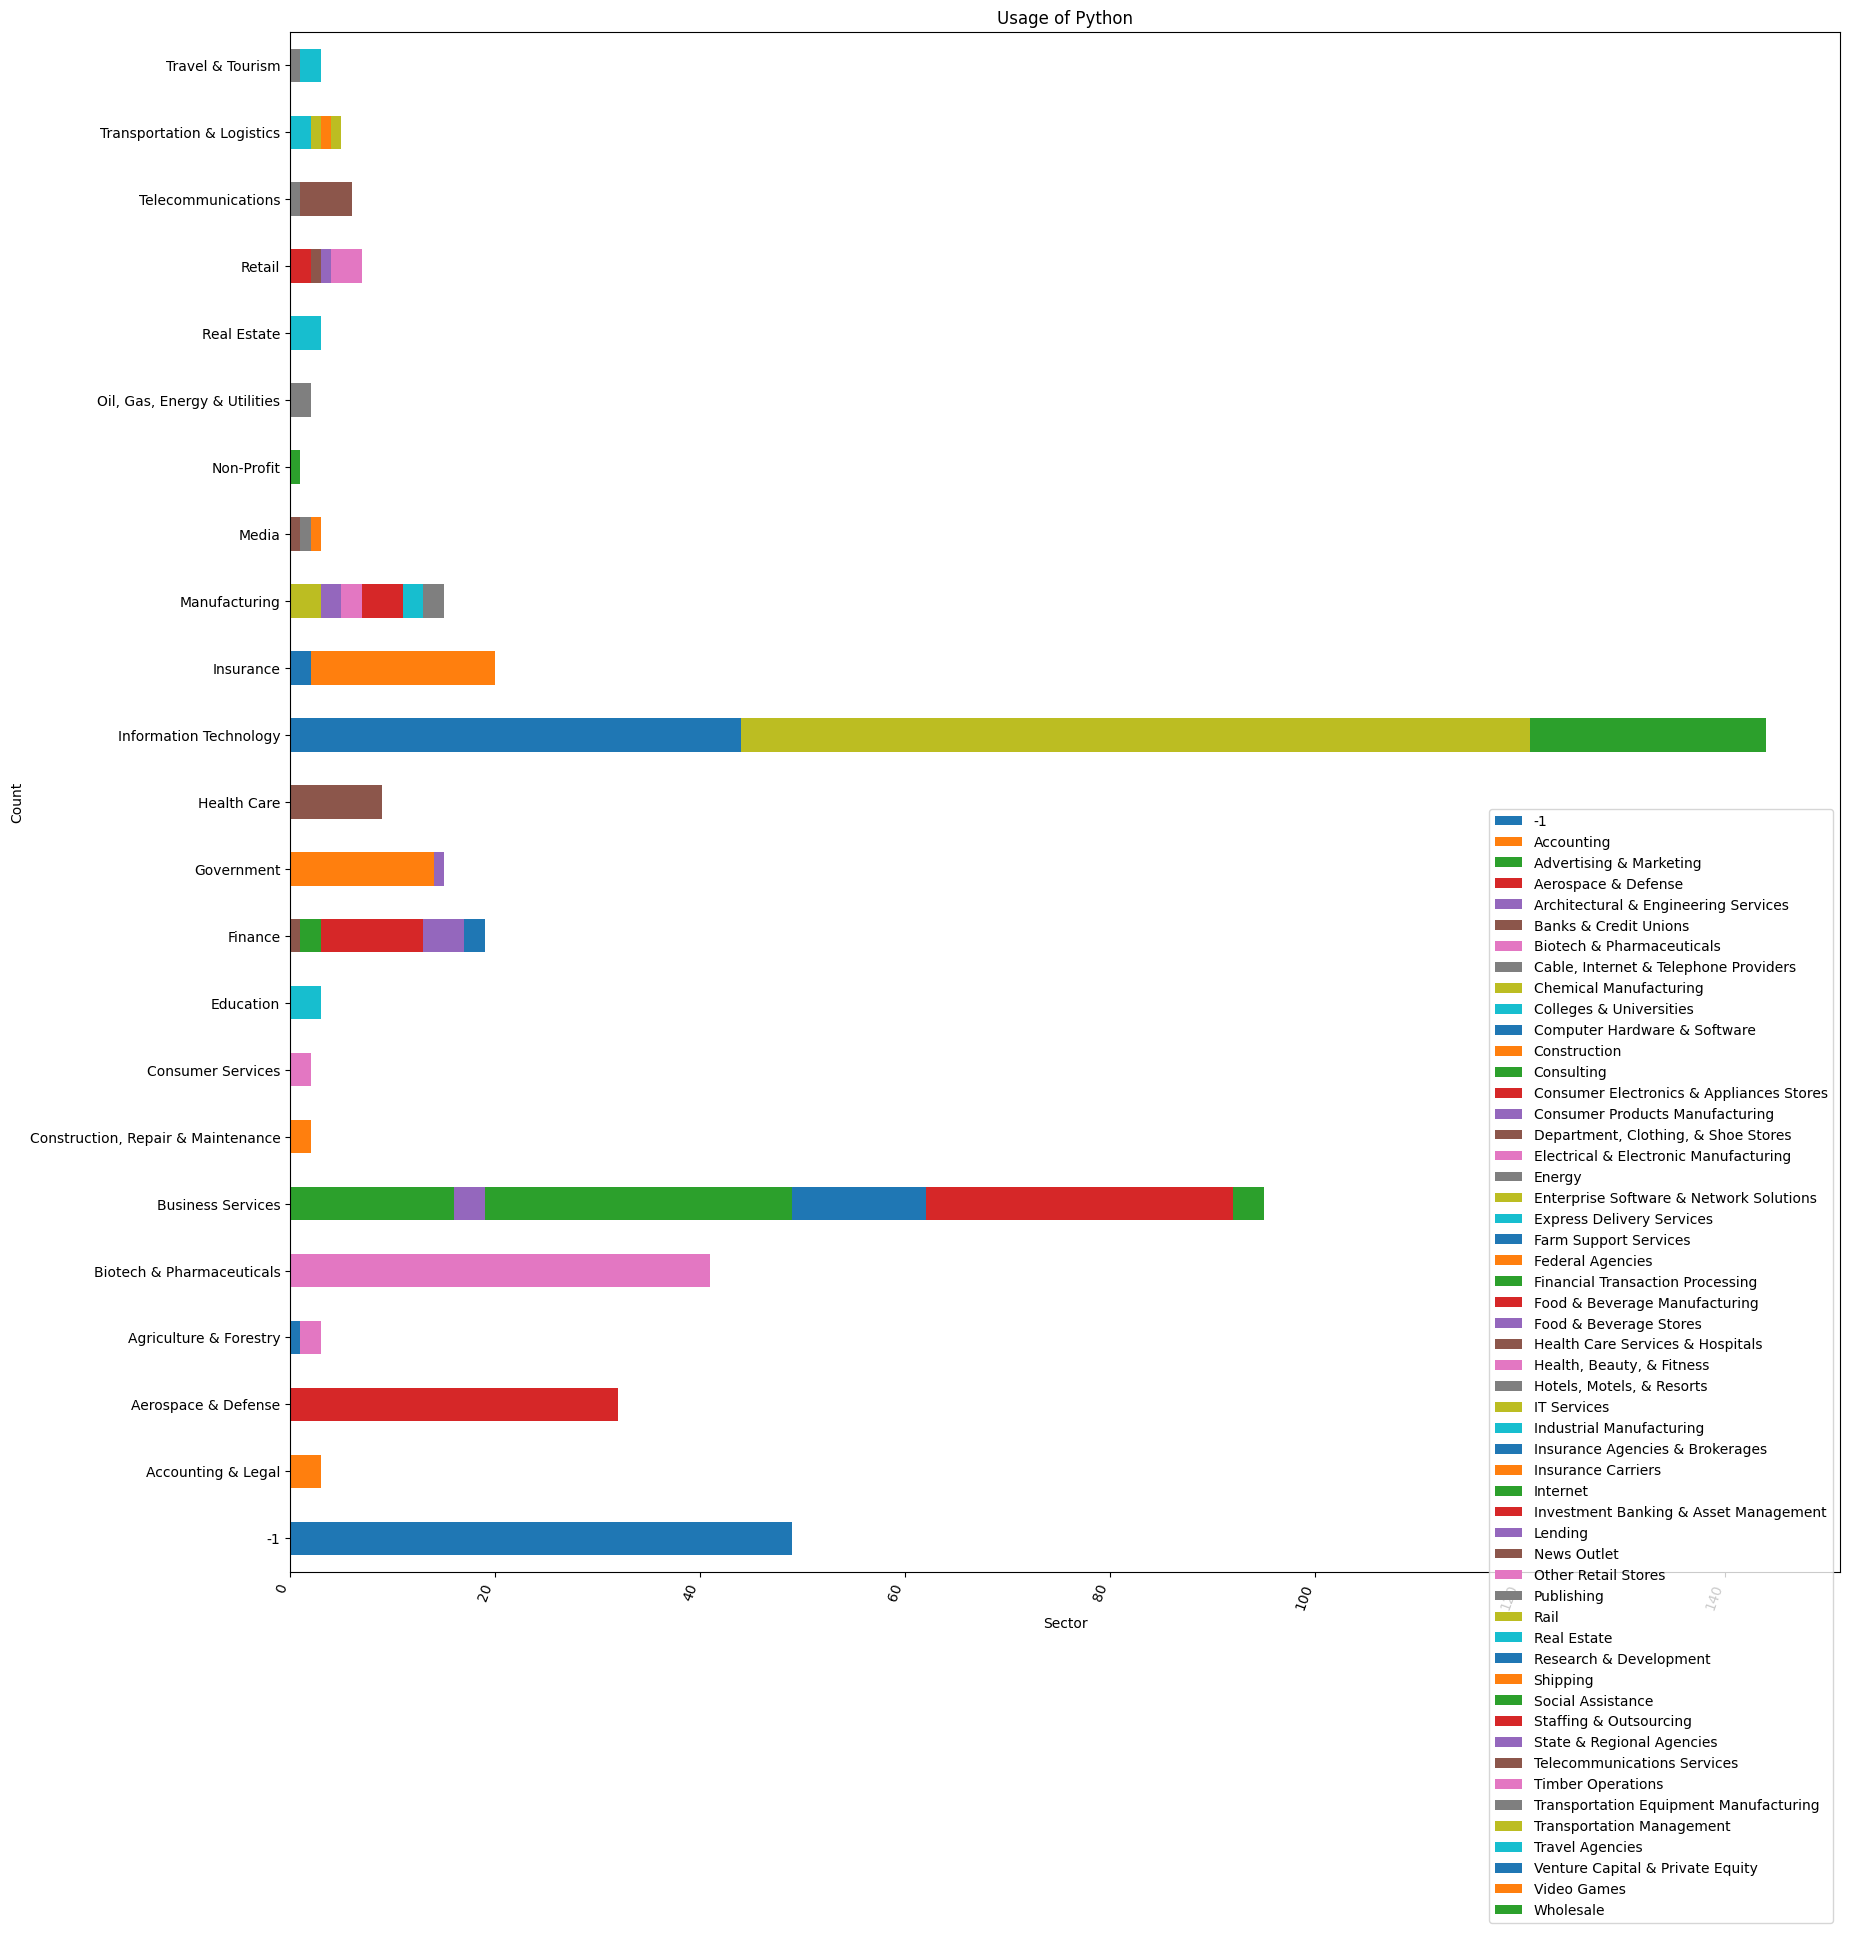

In [15]:
plot_industry_filter_tool(df, 'python')

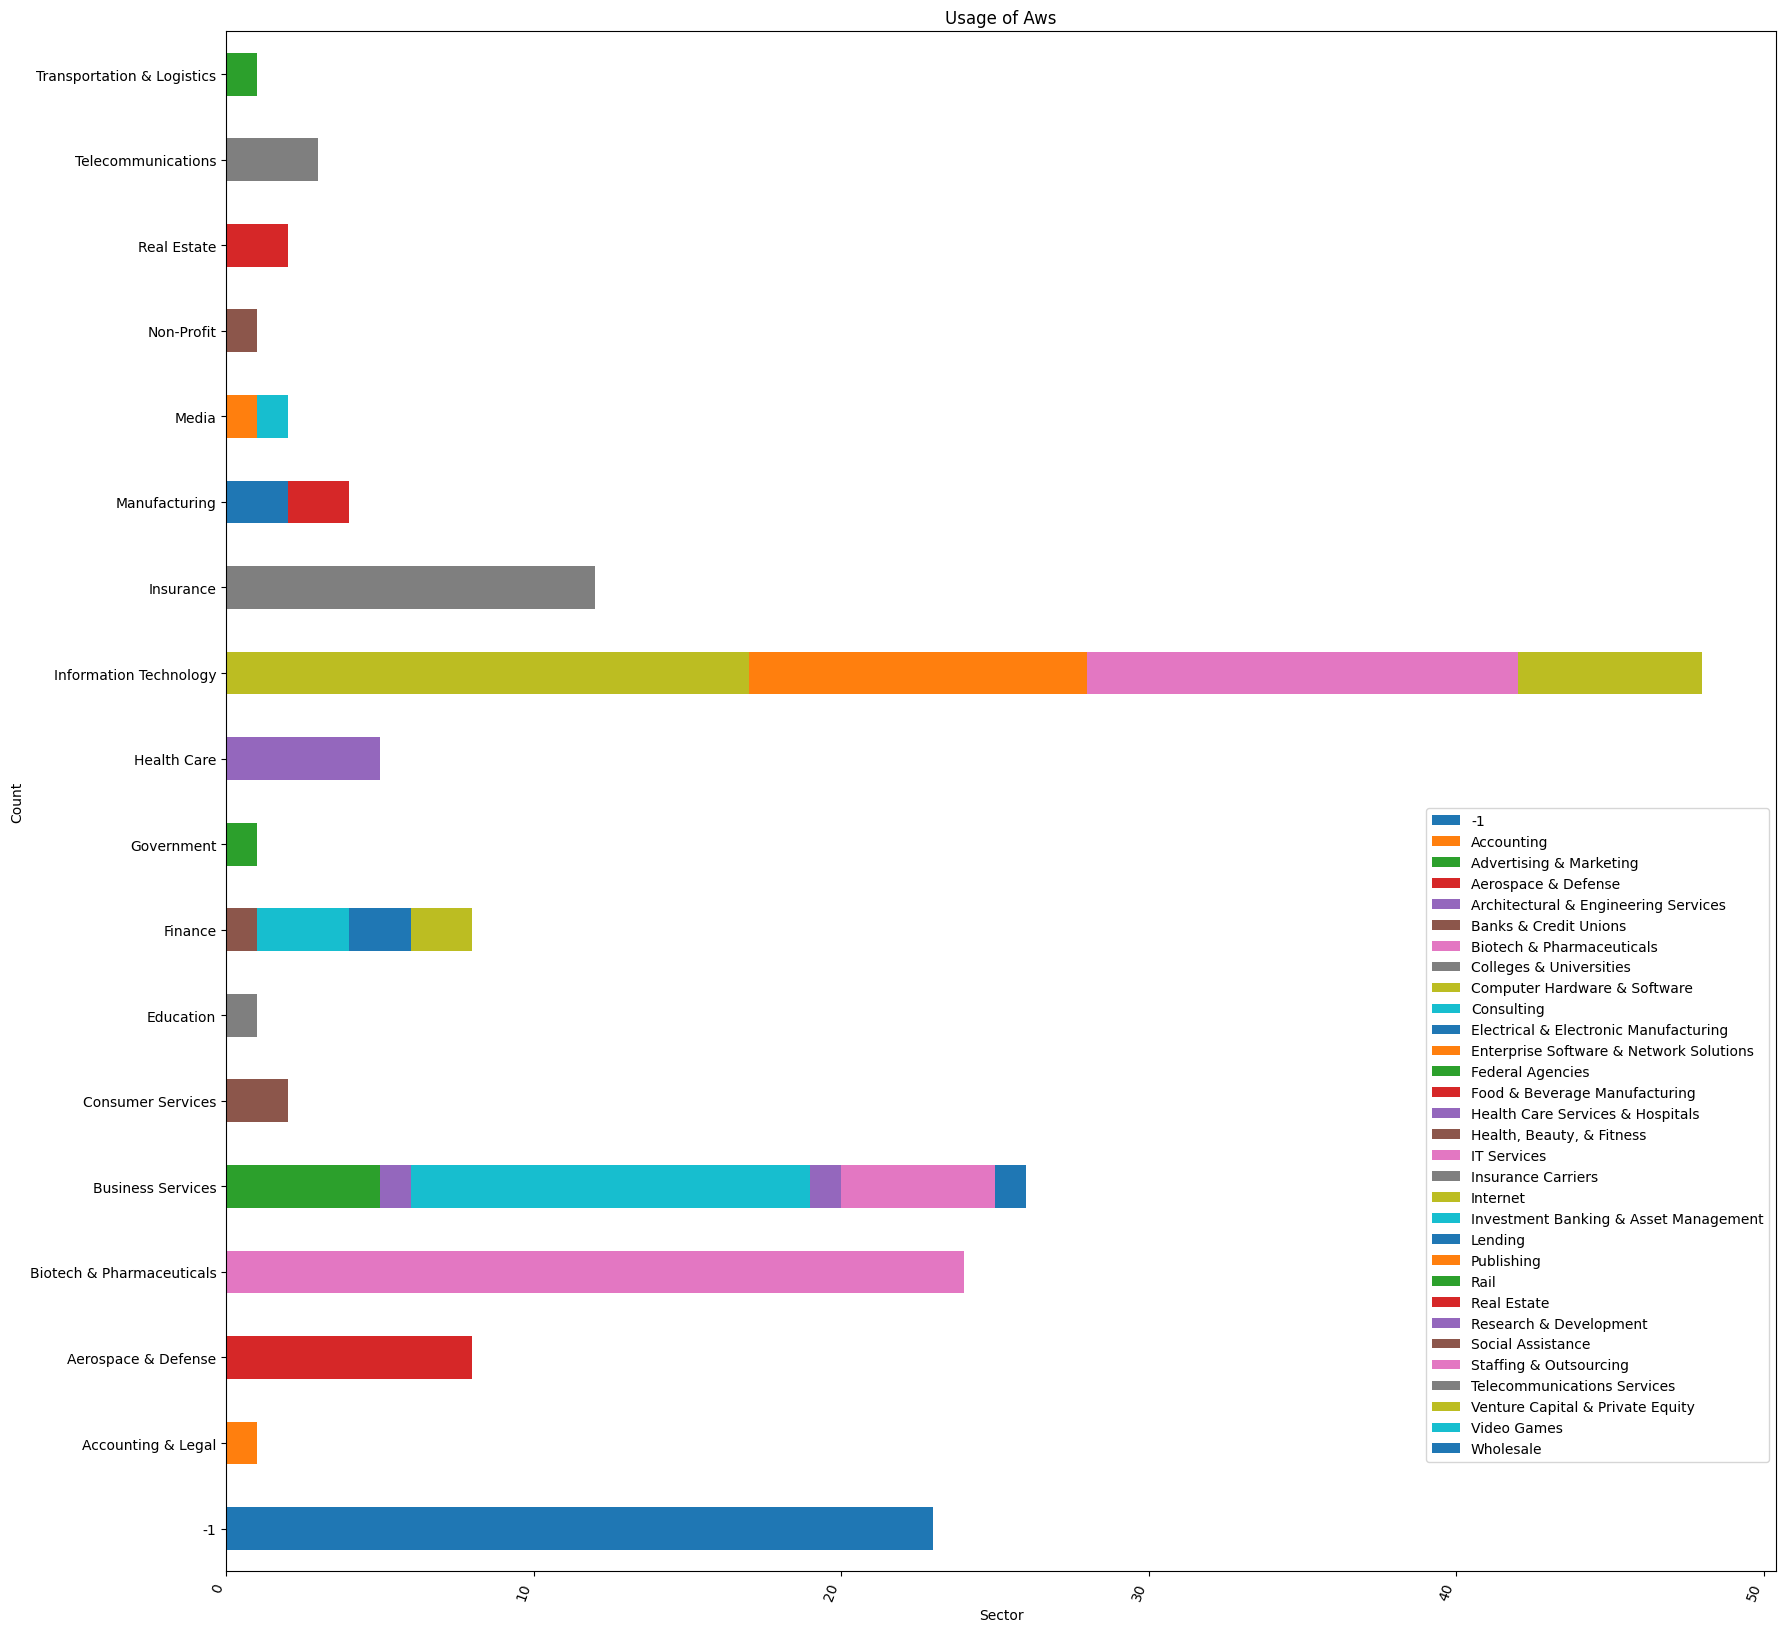

In [16]:
plot_industry_filter_tool(df, 'aws')

[Text(0.5, 1.0, 'Count of various Job roles')]

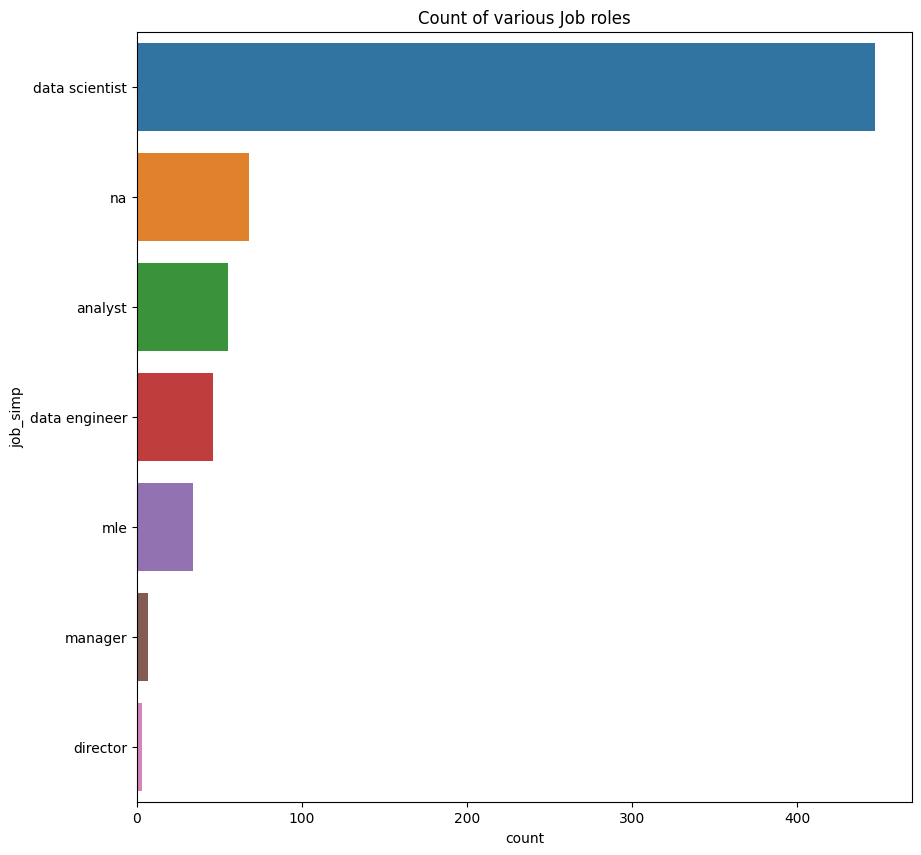

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(data=df, y='job_simp', order=df['job_simp'].value_counts().index).set(title='Count of various Job roles')

<AxesSubplot: xlabel='job_simp', ylabel='avg_salary'>

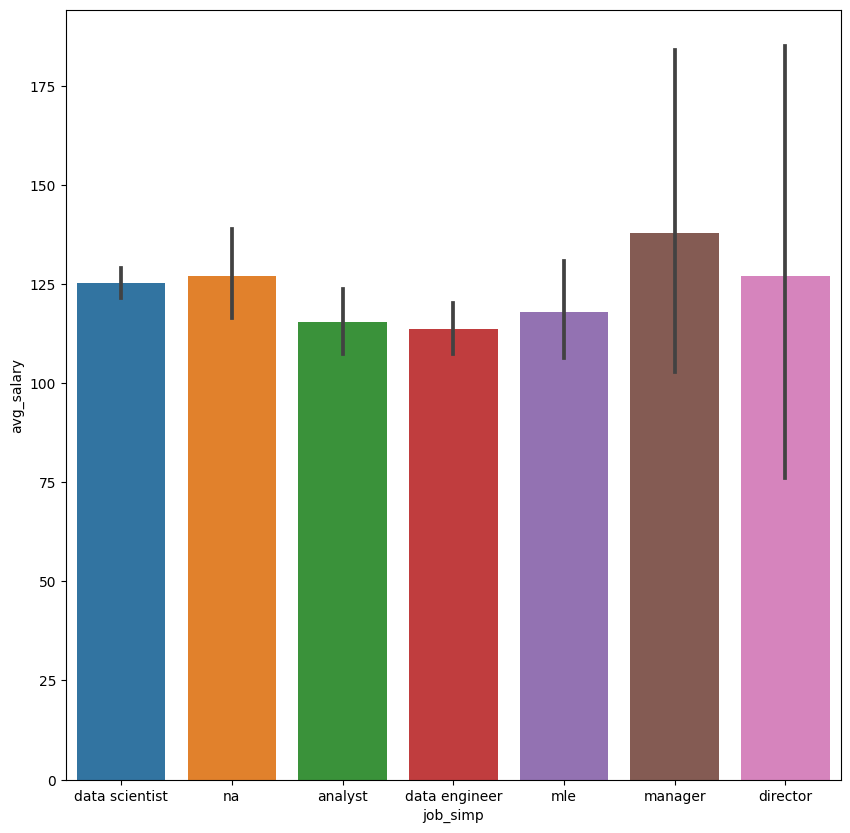

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(data=df, x='job_simp', y='avg_salary')

In [19]:
pd.pivot_table(data=df, values='avg_salary', index='job_simp').sort_values(by='avg_salary')

,avg_salary
job_simp,
data engineer,113.782609
analyst,115.527273
mle,118.058824
data scientist,125.266219
director,127.000000
na,127.088235
manager,137.857143


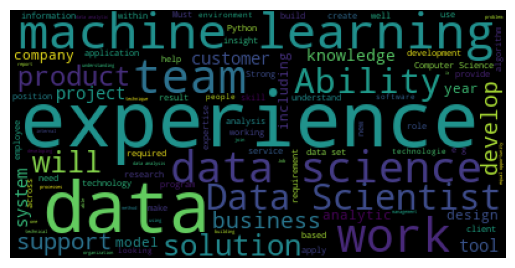

In [22]:
wordcloud = WordCloud().generate(' '.join(df['Job Description']))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()